# Plot all FastCalo shower shapes

This notebook is dedicated to produce some plots to fastcalo instroduction (cut-based studies)

**NOTE**: This notebook presents only mc15 plots.

In [9]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop, load_hdf
from core import Efficiency, restore_efficiencies
from Gaugi import mkdir_p, progressbar
import numpy as np
import pandas as pd
import collections
import os
import array
import root_numpy
import rootplotlib as rpl
from pprint import pprint
from copy import deepcopy
import matplotlib.pyplot as plt
import gc
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle,TCanvas,gPad,TGaxis
import ROOT
GeV=1000
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
output_path = 'output'
mkdir_p(output_path)

In [3]:
dpath = '../data/output/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.dataframe.h5'
data_df = load_hdf(dpath)

In [4]:
is_sgn = (data_df['target']==1)&(data_df['el_lhmedium']==True )
is_bkg = (data_df['target']==0)&(data_df['el_lhvloose']==False)

In [54]:
low_et = (data_df['el_et'] > 5*GeV) & (data_df['el_et'] < 100*GeV)
high_et = (data_df['el_et'] > 100*GeV)
min_et = (data_df['el_et'] > 5*GeV)

In [5]:
def make_1d_histograms(sgn, bkg, bins, xmin, xmax):
    
    h_zee = rpl.hist1d.new( 'zee', bins, xmin ,xmax )
    rpl.hist1d.fill( h_zee, sgn )
    d_zee = rpl.hist1d.density( h_zee )
    d_zee.SetLineColor(kAzure)
    d_zee.SetFillColor(kAzure-4)
    h_jets = rpl.hist1d.new( 'jets', bins, xmin ,xmax )
    rpl.hist1d.fill( h_jets, bkg )
    d_jets = rpl.hist1d.density( h_jets )
    d_jets.SetLineColor(kRed)
    d_jets.SetFillColor(rpl.get_color(kRed, 0.5))
    return d_zee, d_jets

def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=16, option = 'f' )
   

In [123]:
sgn = data_df.loc[ is_sgn & (data_df['el_et'] > 5*GeV) & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_eratio'].values
bkg = data_df.loc[ is_bkg & (data_df['el_et'] > 5*GeV) & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_eratio'].values

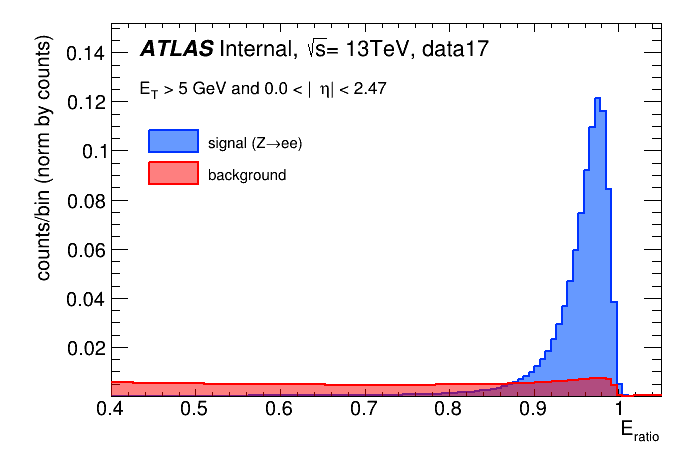

In [124]:
d_zee, d_jets = make_1d_histograms(sgn, bkg, 100, 0.4, 1.05)
fig = rpl.create_canvas('my_canvas')
rpl.add_hist( d_zee,'same' )
rpl.add_hist( d_jets ,'same' )
rpl.set_xlabel('E_{ratio}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_atlas_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, data17')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
legends = ['signal (Z#rightarrowee)', 'background']
add_legend( 0.2,0.6, legends)
rpl.format_canvas_axes( YTitleOffset=1.3) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.25) 
fig.show()
fig.savefig(output_path+'/data17_fastcalo_eratio.pdf')

In [125]:
sgn = data_df.loc[ is_sgn & min_et & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_f3'].values
bkg = data_df.loc[ is_bkg & min_et & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_f3'].values

In [126]:
d_zee, d_jets = make_1d_histograms(sgn, bkg, 100, 0, 0.1)

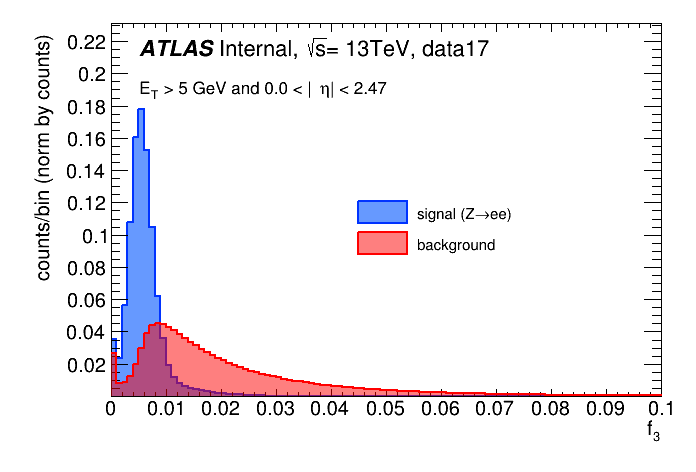

In [127]:
fig = rpl.create_canvas('my_canvas')
rpl.add_hist( d_zee,'same' )
rpl.add_hist( d_jets ,'same' )
rpl.set_xlabel('f_{3}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_atlas_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, data17')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
legends = ['signal (Z#rightarrowee)', 'background']
add_legend( 0.5,0.45, legends)
rpl.format_canvas_axes( YTitleOffset=1.3) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.3) 
fig.show()
fig.savefig(output_path+'/data17_fastcalo_f3.pdf')

In [128]:
sgn = data_df.loc[ is_sgn & min_et & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_f1'].values
bkg = data_df.loc[ is_bkg & min_et & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_f1'].values

In [129]:
d_zee, d_jets = make_1d_histograms(sgn, bkg, 100,-0.1, 0.6)

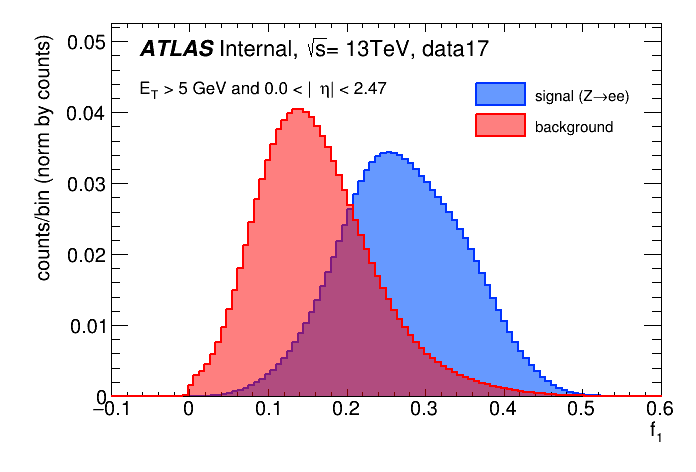

In [130]:
fig = rpl.create_canvas('my_canvas')
rpl.add_hist( d_zee,'same' )
rpl.add_hist( d_jets ,'same' )
rpl.set_xlabel('f_{1}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_atlas_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, data17')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
legends = ['signal (Z#rightarrowee)', 'background']
add_legend( 0.67,0.7, legends)
rpl.format_canvas_axes( YTitleOffset=1.3) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.3) 
fig.show()
fig.savefig(output_path+'/data17_fastcalo_f1.pdf')

In [131]:
sgn = data_df.loc[ is_sgn & min_et & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_weta2'].values
bkg = data_df.loc[ is_bkg & min_et & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_weta2'].values

In [132]:
d_zee, d_jets = make_1d_histograms(sgn, bkg, 100, 0, 0.03)

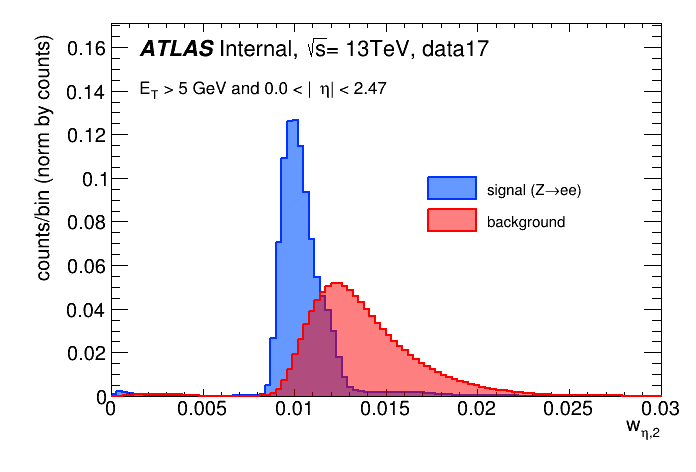

In [133]:
fig = rpl.create_canvas('my_canvas')
rpl.add_hist( d_zee,'same' )
rpl.add_hist( d_jets ,'same' )
rpl.set_xlabel('w_{#eta,2}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_atlas_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, data17')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
legends = ['signal (Z#rightarrowee)', 'background']
add_legend( 0.6,0.5, legends)
rpl.format_canvas_axes( YTitleOffset=1.3) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.35) 
fig.show()
fig.savefig(output_path+'/data17_fastcalo_weta2.pdf')

In [134]:
sgn = data_df.loc[ is_sgn & min_et & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_wstot'].values
bkg = data_df.loc[ is_bkg & min_et & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_wstot'].values

In [135]:
d_zee, d_jets = make_1d_histograms(sgn, bkg, 100, 0, 12)

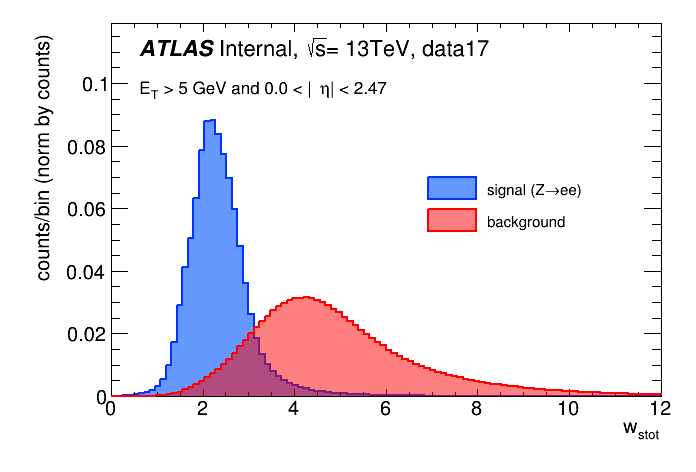

In [136]:
fig = rpl.create_canvas('my_canvas')
rpl.add_hist( d_zee,'same' )
rpl.add_hist( d_jets ,'same' )
rpl.set_xlabel('w_{stot}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_atlas_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, data17')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
legends = ['signal (Z#rightarrowee)', 'background']
add_legend( 0.6,0.5, legends)
rpl.format_canvas_axes( YTitleOffset=1.3) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.35) 
fig.show()
fig.savefig(output_path+'/data17_fastcalo_wstot.pdf')

In [137]:
sgn = data_df.loc[ is_sgn & min_et & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_reta'].values
bkg = data_df.loc[ is_bkg & min_et & (abs(data_df['el_eta']) <= 2.47) ]['trig_L2_cl_reta'].values

In [138]:
d_zee, d_jets = make_1d_histograms(sgn, bkg, 100, 0.5, 1.05)

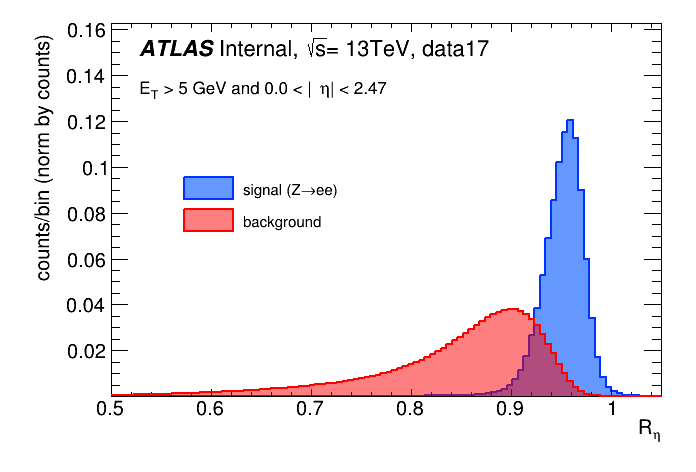

In [139]:
fig = rpl.create_canvas('my_canvas')
rpl.add_hist( d_zee,'same' )
rpl.add_hist( d_jets ,'same' )
rpl.set_xlabel('R_{#eta}')
rpl.set_ylabel('counts/bin (norm by counts)')
rpl.set_atlas_label(0.2,0.88,'Internal, #sqrt{s}= 13TeV, data17')
rpl.add_text(0.2, 0.8, 'E_{T} > 5 GeV and 0.0 < |#eta| < 2.47', textsize=0.04)
legends = ['signal (Z#rightarrowee)', 'background']
add_legend( 0.25,0.5, legends)
rpl.format_canvas_axes( YTitleOffset=1.3) 
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.35) 
fig.show()
fig.savefig(output_path+'/data17_fastcalo_reta.pdf')